<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.182023,27.477545,55.057855,199.113816,332.831238,258.476679,74.354559
1,0.0,1.0,69.090772,43.203581,36.801797,2722.412880,2881.509030,41.864589,2839.644441
2,0.0,2.0,82.932124,60.813209,75.429720,63.063457,292.238510,-71.416296,363.654806
3,0.0,3.0,58.191736,98.371074,79.286317,13801.831409,14047.680536,-666.774486,14714.455022
4,0.0,4.0,32.486620,39.256709,59.497750,928.888902,1070.129980,78.863355,991.266625
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.103132,98.422181,45.765794,9100.610897,9351.902005,748.905926,8602.996079
119996,999.0,116.0,73.546680,50.017193,35.178856,1225.117260,1393.859989,874.884945,518.975043
119997,999.0,117.0,25.971906,61.985168,29.795401,4853.369671,4981.122146,-86.771846,5067.893992
119998,999.0,118.0,56.618461,81.946539,68.663565,-10598.626313,-10381.397748,-238.633345,-10142.764403


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    41.182023  27.477545  55.057855    199.113816    332.831238   
      1.0    69.090772  43.203581  36.801797   2722.412880   2881.509030   
      2.0    82.932124  60.813209  75.429720     63.063457    292.238510   
      3.0    58.191736  98.371074  79.286317  13801.831409  14047.680536   
      4.0    32.486620  39.256709  59.497750    928.888902   1070.129980   
...                ...        ...        ...           ...           ...   
999.0 115.0  97.103132  98.422181  45.765794   9100.610897   9351.902005   
      116.0  73.546680  50.017193  35.178856   1225.117260   1393.859989   
      117.0  25.971906  61.985168  29.795401   4853.369671   4981.122146   
      118.0  56.618461  81.946539  68.663565 -10598.626313 -10381.397748   
      119.0  49.794211  72.543869  58.683837  -9407.245607  -9216.223689   

                  y_hat         e_hat  
rep   index                            
0.0   0.0    258.476679     74.354559  
      1.0     41.864589   2839.644441  
      2.0    -71.416296    363.654806  
      3.0   -666.774486  14714.455022  
      4.0     78.863355    991.266625  
...                 ...           ...  
999.0 115.0  748.905926   8602.996079  
      116.0  874.884945    518.975043  
      117.0  -86.771846   5067.893992  
      118.0 -238.633345 -10142.764403  
      119.0 -140.954887  -9075.268803  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    41.182023  27.477545  55.057855    199.113816    332.831238   
      1.0    69.090772  43.203581  36.801797   2722.412880   2881.509030   
      2.0    82.932124  60.813209  75.429720     63.063457    292.238510   
      3.0    58.191736  98.371074  79.286317  13801.831409  14047.680536   
      4.0    32.486620  39.256709  59.497750    928.888902   1070.129980   
...                ...        ...        ...           ...           ...   
999.0 115.0  97.103132  98.422181  45.765794   9100.610897   9351.902005   
      116.0  73.546680  50.017193  35.178856   1225.117260   1393.859989   
      117.0  25.971906  61.985168  29.795401   4853.369671   4981.122146   
      118.0  56.618461  81.946539  68.663565 -10598.626313 -10381.397748   
      119.0  49.794211  72.543869  58.683837  -9407.245607  -9216.223689   

                  y_hat         e_hat  
rep   index                            
0.0   0.0    258.476679     74.354559  
      1.0     41.864589   2839.644441  
      2.0    -71.416296    363.654806  
      3.0   -666.774486  14714.455022  
      4.0     78.863355    991.266625  
...                 ...           ...  
999.0 115.0  748.905926   8602.996079  
      116.0  874.884945    518.975043  
      117.0  -86.771846   5067.893992  
      118.0 -238.633345 -10142.764403  
      119.0 -140.954887  -9075.268803  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.182023,27.477545,55.057855,199.113816,332.831238,258.476679,74.354559
1,0.0,1.0,69.090772,43.203581,36.801797,2722.412880,2881.509030,41.864589,2839.644441
2,0.0,2.0,82.932124,60.813209,75.429720,63.063457,292.238510,-71.416296,363.654806
3,0.0,3.0,58.191736,98.371074,79.286317,13801.831409,14047.680536,-666.774486,14714.455022
4,0.0,4.0,32.486620,39.256709,59.497750,928.888902,1070.129980,78.863355,991.266625
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,97.103132,98.422181,45.765794,9100.610897,9351.902005,748.905926,8602.996079
119996,999.0,116.0,73.546680,50.017193,35.178856,1225.117260,1393.859989,874.884945,518.975043
119997,999.0,117.0,25.971906,61.985168,29.795401,4853.369671,4981.122146,-86.771846,5067.893992
119998,999.0,118.0,56.618461,81.946539,68.663565,-10598.626313,-10381.397748,-238.633345,-10142.764403


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3             e             Y  \
rep   index                                                                
0.0   0.0    41.182023  27.477545  55.057855    199.113816    332.831238   
      1.0    69.090772  43.203581  36.801797   2722.412880   2881.509030   
      2.0    82.932124  60.813209  75.429720     63.063457    292.238510   
      3.0    58.191736  98.371074  79.286317  13801.831409  14047.680536   
      4.0    32.486620  39.256709  59.497750    928.888902   1070.129980   
...                ...        ...        ...           ...           ...   
999.0 115.0  97.103132  98.422181  45.765794   9100.610897   9351.902005   
      116.0  73.546680  50.017193  35.178856   1225.117260   1393.859989   
      117.0  25.971906  61.985168  29.795401   4853.369671   4981.122146   
      118.0  56.618461  81.946539  68.663565 -10598.626313 -10381.397748   
      119.0  49.794211  72.543869  58.683837  -9407.245607  -9216.223689   

                  y_hat         e_hat  
rep   index                            
0.0   0.0    258.476679     74.354559  
      1.0     41.864589   2839.644441  
      2.0    -71.416296    363.654806  
      3.0   -666.774486  14714.455022  
      4.0     78.863355    991.266625  
...                 ...           ...  
999.0 115.0  748.905926   8602.996079  
      116.0  874.884945    518.975043  
      117.0  -86.771846   5067.893992  
      118.0 -238.633345 -10142.764403  
      119.0 -140.954887  -9075.268803  

[120000 rows x 7 columns]

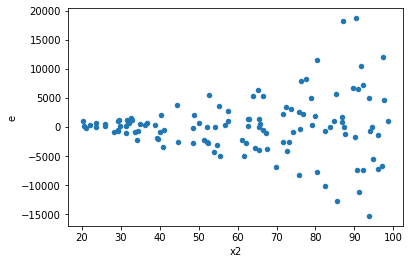

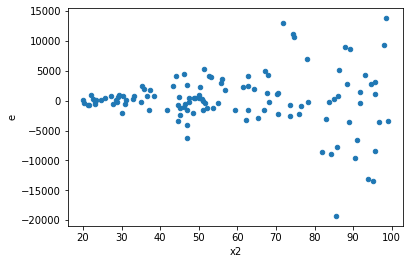

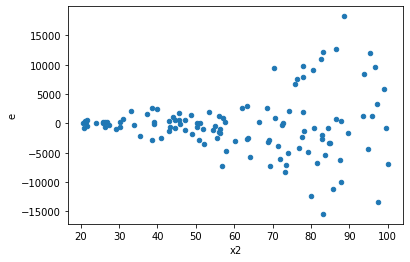

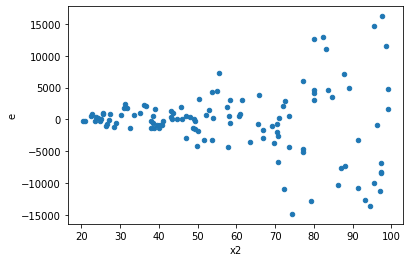

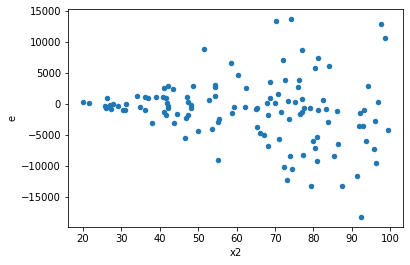

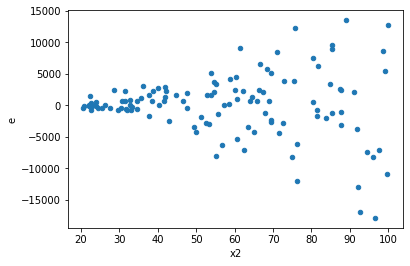

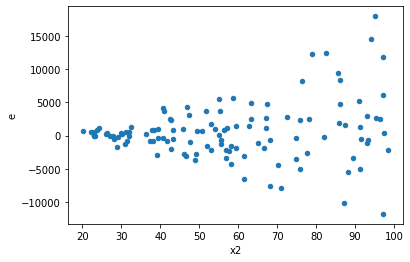

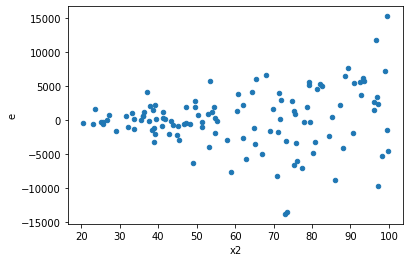

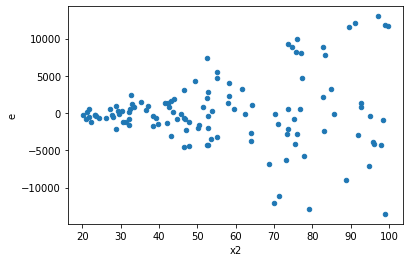

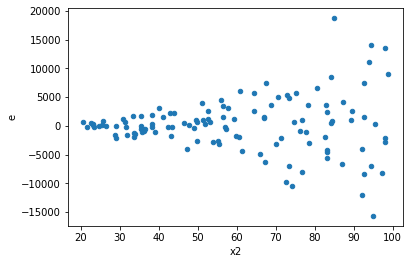

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,66.0,48.0,1184000075.421688,1451966983.1852098,17939395.08214679,30249312.14969187,1.6861946576892024,0.05895644727278215,0.9705217763636089,0.029478223636391077,Reject005=1 : Homoscedasticity
3.0,54.0,60.0,953307232.8610182,1411111317.5828543,17653837.64557441,23518521.959714238,1.33220450034047,0.27921882701477574,0.8603905864926121,0.13960941350738787,Reject005=1 : Homoscedasticity
7.0,53.0,61.0,240974928.7538787,2866606811.2618103,4546696.768941108,46993554.282980494,10.335757291754678,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,64.0,50.0,1941925986.6189702,2082944617.990278,30342593.54092141,41658892.35980556,1.3729509411785277,0.24551877376503772,0.8772406131174811,0.12275938688251886,Reject005=1 : Homoscedasticity
10.0,50.0,64.0,1066342708.5585068,1525296590.9378464,21326854.171170138,23832759.23340385,1.117499985798244,0.6699946257632665,0.6650026871183667,0.33499731288163326,Reject005=1 : Homoscedasticity
12.0,57.0,57.0,586709158.1676521,2286379779.774245,10293143.125748282,40111925.96095166,3.8969560095411224,8.052152156157177e-07,0.9999995973923922,4.0260760780785887e-07,Reject005=0 : Heteroscedasticity
13.0,57.0,57.0,817099293.5662681,2186526947.740472,14335075.325724002,38360121.89018372,2.675962352381034,0.0002846530805953318,0.9998576734597023,0.0001423265402976659,Reject005=0 : Heteroscedasticity
14.0,56.0,58.0,1116212359.7798026,2040926768.1035092,19932363.567496475,35188392.55350878,1.7653898612852001,0.03343685722330503,0.9832815713883475,0.016718428611652514,Reject005=0 : Heteroscedasticity
15.0,54.0,60.0,1280609812.2571046,1562381509.4969528,23714996.523279715,26039691.824949212,1.0980263817195786,0.7219416060322923,0.6390291969838539,0.36097080301614615,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,54.0,1603014416.5343816,1364305392.227283,26716906.942239694,25264914.670875613,0.9456526807349669,0.8301713639302233,Reject005=1 : Homoscedasticity
1.0,54.0,60.0,3863625146.9506965,385700207.24514484,71548613.8324203,6428336.787419081,0.08984572087553505,6.683194788553312e-16,Reject005=0 : Heteroscedasticity
2.0,66.0,48.0,1184000075.421688,1451966983.1852098,17939395.08214679,30249312.14969187,1.6861946576892024,0.05895644727278215,Reject005=1 : Homoscedasticity
3.0,54.0,60.0,953307232.8610182,1411111317.5828543,17653837.64557441,23518521.959714238,1.33220450034047,0.27921882701477574,Reject005=1 : Homoscedasticity
4.0,45.0,69.0,1841289662.3219156,166636328.82872787,40917548.051598124,2415019.2583873603,0.05902160254915462,9.943708766308996e-18,Reject005=0 : Heteroscedasticity
5.0,53.0,61.0,2585800887.4287567,185773650.66253665,48788695.989221826,3045469.6829924043,0.06242162495314889,2.2396918688378417e-19,Reject005=0 : Heteroscedasticity
6.0,66.0,48.0,1763850862.1198084,1111071493.088674,26725013.06242134,23147322.77268071,0.8661295213819258,0.582792843436203,Reject005=1 : Homoscedasticity
7.0,53.0,61.0,240974928.7538787,2866606811.2618103,4546696.768941108,46993554.282980494,10.335757291754678,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,64.0,50.0,1941925986.6189702,2082944617.990278,30342593.54092141,41658892.35980556,1.3729509411785277,0.24551877376503772,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    581
Reject005=1 : Homoscedasticity      419
Name: Result_test, dtype: int64